## Задание 1. Работа с реальными данным

In [448]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [449]:
def read_gff(path):
    c_names = ['seq_id', 'source', 'type',
                'start', 'end', 'score', 'strand',
                'phase', 'attributes']
    gff_df = pd.read_csv(path, names=c_names, skiprows=1, sep='\t')
    return gff_df

In [450]:
ann = read_gff('rrna_annotation.gff')
ann

,seq_id,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [451]:
def only_RNA(df):
    df['attributes'] = df['attributes'].apply(lambda x: x.split('=')[1].split('_')[0])
    return df

In [452]:
only_RNA(ann)

,seq_id,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [453]:
def read_bed6(path):
    c_names = ['seq_id', 'start', 'end',
                'name', 'score', 'strand']
    bed_df = pd.read_csv(path, names=c_names, sep='\t')
    return bed_df

In [454]:
bed = read_bed6('alignment.bed')
bed

,seq_id,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [455]:
def inter(df1,df2):
    inter_df = df1.merge(df2, on='seq_id').query('(start_x >= start_y) & (end_x <= end_y)')
    return inter_df

In [456]:
new_df = inter(ann, bed)
new_df

,seq_id,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


In [457]:
def rna_counter(df):
    rna_count = df.groupby(['seq_id','attributes']).size().reset_index(name='count')
    return rna_count

In [458]:
rna_df = rna_counter(ann)
rna_df

,seq_id,attributes,count
0,Reference_1,16S,2
1,Reference_1,23S,2
2,Reference_1,5S,2
3,Reference_10,16S,5
4,Reference_10,23S,5
...,...,...,...
71,Reference_8,16S,2
72,Reference_8,23S,2
73,Reference_9,16S,6
74,Reference_9,23S,6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Reference_1'),
  Text(1, 0, 'Reference_10'),
  Text(2, 0, 'Reference_11'),
  Text(3, 0, 'Reference_12'),
  Text(4, 0, 'Reference_13'),
  Text(5, 0, 'Reference_14'),
  Text(6, 0, 'Reference_15'),
  Text(7, 0, 'Reference_16'),
  Text(8, 0, 'Reference_17'),
  Text(9, 0, 'Reference_18'),
  Text(10, 0, 'Reference_19'),
  Text(11, 0, 'Reference_2'),
  Text(12, 0, 'Reference_20'),
  Text(13, 0, 'Reference_21'),
  Text(14, 0, 'Reference_22'),
  Text(15, 0, 'Reference_23'),
  Text(16, 0, 'Reference_24'),
  Text(17, 0, 'Reference_25'),
  Text(18, 0, 'Reference_26'),
  Text(19, 0, 'Reference_3'),
  Text(20, 0, 'Reference_4'),
  Text(21, 0, 'Reference_5'),
  Text(22, 0, 'Reference_6'),
  Text(23, 0, 'Reference_7'),
  Text(24, 0, 'Reference_8'),
  Text(25, 0, 'Reference_9')])

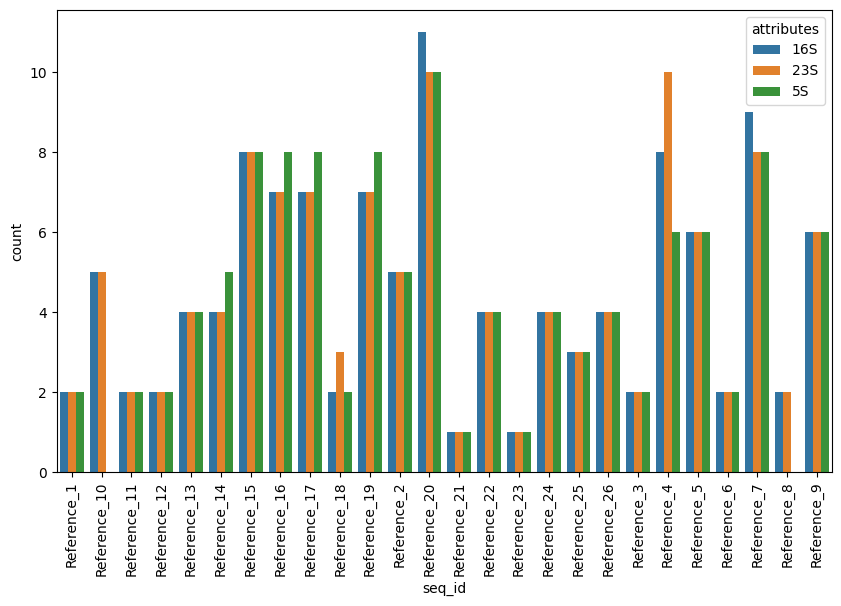

In [459]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=rna_df, x='seq_id', y='count', hue='attributes')
plt.xticks(rotation=90)

## Задание 2. Визуализация данных

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

from matplotlib.ticker import AutoMinorLocator

In [467]:
df = pd.read_csv('diffexpr_data.tsv.gz', sep='\t')
df

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


In [468]:
p05 = - math.log10(0.05)

In [469]:
def group(x):
    if x.log_pval < p05 and x.logFC < 0:
        return 'Non-significantly downregulated'
    elif x.log_pval > p05 and x.logFC < 0:
        return 'Significantly downregulated'
    elif x.log_pval < p05 and x.logFC > 0:\
        return 'Non-significantly upregulated'
    else:
        return 'Significantly upregulated'

In [470]:
df['new_factor'] = df.apply(group, axis=1)

In [471]:
group_df = df.groupby('new_factor')
largest = group_df['logFC'].nlargest(2).reset_index()
lowest = group_df['logFC'].nsmallest(2).reset_index()

lar_key_1 = largest.query('new_factor == "Significantly upregulated"')['level_1'].iloc[0]
lar_key_2 = largest.query('new_factor == "Significantly upregulated"')['level_1'].iloc[1]

low_key_1 = lowest.query('new_factor == "Significantly downregulated"')['level_1'].iloc[0]
low_key_2 = lowest.query('new_factor == "Significantly downregulated"')['level_1'].iloc[1]

lar_g1_n = df['Sample'].iloc[lar_key_1]
lar_g1_x = df['logFC'].iloc[lar_key_1]
lar_g1_y = df['log_pval'].iloc[lar_key_1]

lar_g2_n = df['Sample'].iloc[lar_key_2]
lar_g2_x = df['logFC'].iloc[lar_key_2]
lar_g2_y = df['log_pval'].iloc[lar_key_2]

low_g1_n = df['Sample'].iloc[low_key_1]
low_g1_x = df['logFC'].iloc[low_key_1]
low_g1_y = df['log_pval'].iloc[low_key_1]

low_g2_n = df['Sample'].iloc[low_key_2]
low_g2_x = df['logFC'].iloc[low_key_2]
low_g2_y = df['log_pval'].iloc[low_key_2]


Text(-9.3, 12, 'MUC7')

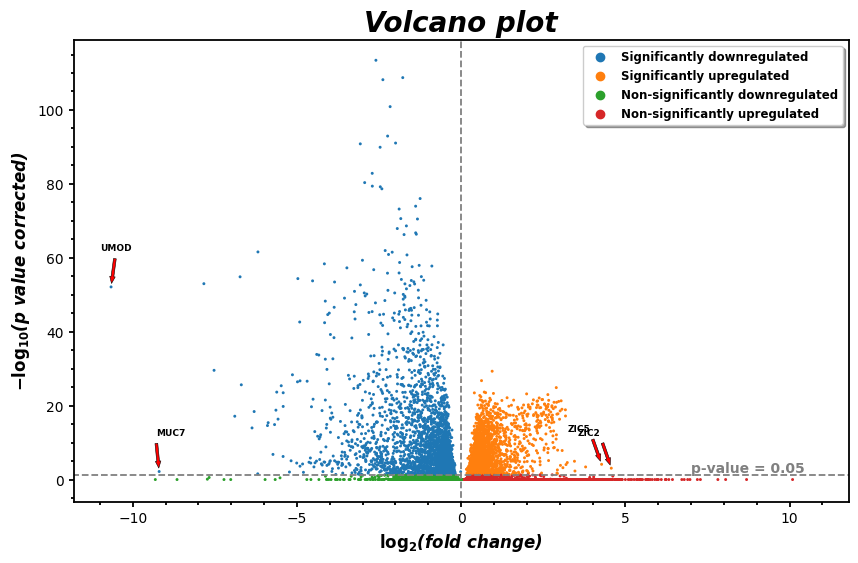

In [472]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=df, x='logFC', y='log_pval', hue='new_factor', s=4.5, linewidth=0,
                     hue_order=['Significantly downregulated', 'Significantly upregulated', 
                                'Non-significantly downregulated', 'Non-significantly upregulated'])
plt.vlines(0, ymin=-10, ymax=140, linestyle="--", color='gray', linewidth=1.3)
plt.hlines(p05, xmin=-13, xmax=13, linestyle="--", color='gray', linewidth=1.3)
plt.ylim(-6, 119)
plt.xlim(-11.8, 11.8)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.legend().set_title('')
ax.legend(prop={'size':'8.5','weight':'bold'}, markerscale=1, shadow=True)
ax.set_title('Volcano plot', fontstyle='italic', size=20, fontweight='bold')
ax.set_ylabel(r'$\bf{-log _{10}}$(p value corrected)', fontstyle='italic', size=12, fontweight='bold')
ax.set_xlabel(r'$\bf{log _{2}}$(fold change)', fontsize=12, fontstyle='italic', fontweight='bold')
ax.text(7, 2, 'p-value = 0.05', fontsize=10, fontweight='bold', color='gray')
ax.xaxis.set_tick_params(which='major', width=1.3)
ax.yaxis.set_tick_params(which='major', width=1.3)
ax.xaxis.set_tick_params(which='minor', width=1.3)
ax.yaxis.set_tick_params(which='minor', width=1.3)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.3)
ax.annotate(text=lar_g1_n, xy=(lar_g1_x, lar_g1_y), size = 6.5, xytext=(3.55, 12), weight='bold',
            arrowprops=dict(width=2, headwidth=4, headlength=5, fc='red', lw=0.4, shrink=0.1))
ax.annotate(text=lar_g2_n, xy=(lar_g2_x, lar_g2_y), size = 6.5, xytext=(3.25, 13), weight='bold',
            arrowprops=dict(width=2, headwidth=4, headlength=5, fc='red', lw=0.4, shrink=0.1))
ax.annotate(text=low_g1_n, xy=(low_g1_x, low_g1_y), size = 6.5, xytext=(-11, 62), weight='bold',
            arrowprops=dict(width=2, headwidth=4, headlength=5, fc='red', lw=0.4, shrink=0.1)),
ax.annotate(text=low_g2_n, xy=(low_g2_x, low_g2_y), size = 6.5, xytext=(-9.3, 12), weight='bold',
            arrowprops=dict(width=2, headwidth=4, headlength=5, fc='red', lw=0.4, shrink=0.1))